In [144]:
%matplotlib inline

from keras import backend as K
from keras.callbacks import TensorBoard
from keras import objectives, regularizers
from keras.datasets import mnist
from keras.layers import Input, Dense, Dropout, Lambda
from keras.models import Model

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy import io

from keras.datasets import mnist
#from keras.activations import softmax

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [238]:
# information dimension regularization penalty
def id_reg(act):
    #p = act / K.sum(act, axis=1)[:,None]
    p = K.softmax(act)
    H = -K.sum(p * K.log(p + 1e-9), axis=1)
    lam = 1e-5
    return lam * H

In [239]:
batch_size = 100
original_dim = 784
latent_dim = 2
epochs = 10
p_dropout = 0.01
l1_act_1 = 1e-1000
id_act_1 = 1e-10
l1_act_2 = 1e-1000

input_vec = Input(shape=(original_dim,))
e1 = Dropout(p_dropout)(input_vec)
e2 = Dense(1024, activation='relu',activity_regularizer=id_reg)(e1)
#e2 = Dense(400, activation='relu',activity_regularizer=regularizers.l1(l1_act_1))(e1)
e3 = Dense(512, activation='relu',activity_regularizer=regularizers.l1(l1_act_2))(e2)
e4 = Dense(256, activation='relu',activity_regularizer=regularizers.l1(l1_act_2))(e3)
e5 = Dense(latent_dim, activation='linear')(e4)
d1 = Dense(256, activation='relu')(e5)
d2 = Dense(512, activation='relu')(d1)
d3 = Dense(1024, activation='relu')(d2)
d4 = Dense(original_dim, activation='sigmoid')(d3)

autoencoder = Model(input=input_vec, output=d4)
encoder = Model(input=input_vec, output=e5)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [240]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                verbose=1,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 38s - loss: 0.2210 - val_loss: 0.1945
Epoch 2/10
60000/60000 [==============================] - 38s - loss: 0.1900 - val_loss: 0.1852
Epoch 3/10
60000/60000 [==============================] - 38s - loss: 0.1837 - val_loss: 0.1834
Epoch 4/10
60000/60000 [==============================] - 37s - loss: 0.1798 - val_loss: 0.1780
Epoch 5/10
60000/60000 [==============================] - 38s - loss: 0.1768 - val_loss: 0.1754
Epoch 6/10
60000/60000 [==============================] - 38s - loss: 0.1751 - val_loss: 0.1745
Epoch 7/10
60000/60000 [==============================] - 38s - loss: 0.1745 - val_loss: 0.1739
Epoch 8/10
60000/60000 [==============================] - 38s - loss: 0.1723 - val_loss: 0.1711
Epoch 9/10
60000/60000 [==============================] - 38s - loss: 0.1702 - val_loss: 0.1698
Epoch 10/10
60000/60000 [==============================] - 37s - loss: 0.1693 - val_lo

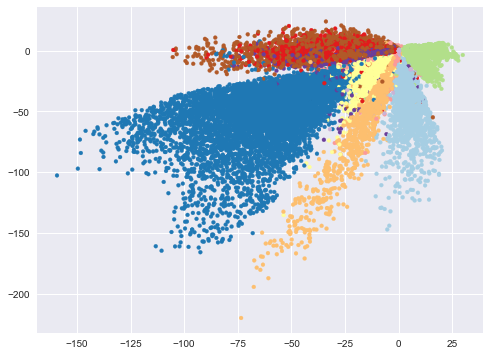

In [242]:
# plot train, embedding layer
x_train_encoded = encoder.predict(x_train, batch_size=batch_size)
plt.figure(figsize=(8, 6))
plt.scatter(x_train_encoded[:, 0], x_train_encoded[:, 1], c=y_train, s=15, cmap="Paired")
plt.show()